<a href="https://colab.research.google.com/github/mfernandasilvestre/ImersaoDados/blob/main/Desafio03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*criar tabelas de frequência com o pandas.py (groupby)*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

dados_resultados=pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

---
---

###**DESAFIO 01** 
*criar tabelas de frequência com o pandas.py (groupby)*

In [2]:
dados.groupby(by=['dose', 'tempo'])['tratamento'].value_counts().unstack()


#df_dados.groupby(['tempo', 'dose'] )['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

---
---

###**DESAFIO 02** 
*normalizar o crosstab pela coluna*

In [3]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

---
---

###**DESAFIO 03** 
*Explorar outros agregadores (crosstab)*

In [4]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='count', normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

---
---

###**DESAFIO 04** 
*Explorar o melt*

In [5]:
pd.melt(dados, id_vars=['dose', 'tempo', 'tratamento'], value_vars=['g-0'], var_name='gene', value_name='value')

,dose,tempo,tratamento,gene,value
0,D1,24,com_droga,g-0,1.0620
1,D1,72,com_droga,g-0,0.0743
2,D1,48,com_droga,g-0,0.6280
3,D1,48,com_droga,g-0,-0.5138
4,D2,72,com_droga,g-0,-0.3254
...,...,...,...,...,...
23809,D2,24,com_droga,g-0,0.1394
23810,D2,24,com_droga,g-0,-1.3260
23811,D2,48,com_controle,g-0,0.3942
23812,D1,24,com_droga,g-0,0.6660


In [6]:
pd.pivot_table(dados, values='g-0', index=['tratamento', 'tempo'], aggfunc='mean')

g-0
tratamento   tempo          
com_controle 24    -0.119637
             48    -0.058786
             72    -0.113108
com_droga    24     0.241695
             48     0.318944
             72     0.269890

---
---

###**DESAFIO 05** 
*Calcular e analisar a correlação entre os g's e c's. Refletir sobre os efeitos biológicos*

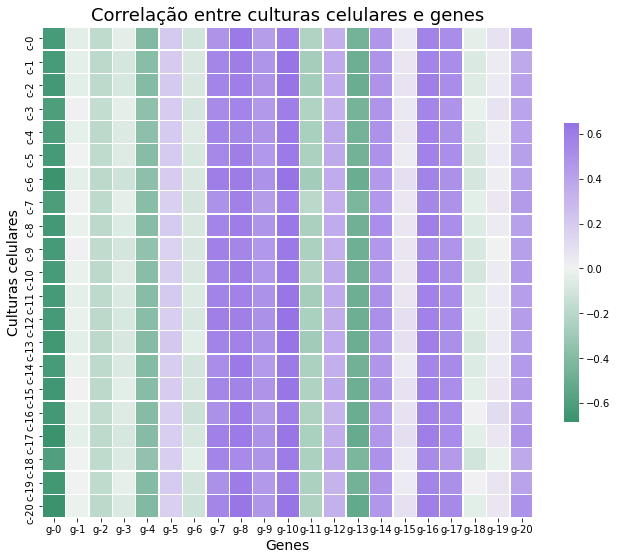

In [7]:
celular = dados.loc[:,'c-0':'c-20']
genes = dados.loc[:,'g-0':'g-20']
dados_corr = pd.concat([genes, celular], axis=1)  # axis significa que vc quer juntar pelas colunas
corr_gc = dados_corr.corr().loc['c-0':'c-20','g-0':'g-20']

# nesse não gera aquela mask que faz ficar triangular pq queremos ver por completo a relação c com g

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_gc, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Culturas celulares', fontsize=14)
plt.title('Correlação entre culturas celulares e genes', fontsize=18)
plt.show()